In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_BM = pd.read_csv('../../datasets/JoinCollection NSC2_BND_M20.csv')
df_BM[:2]

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
0,0,3000,1921LE,200805.0,1,0,30,5.0,2002
1,1,6000,1921LE,200805.0,1,0,60,5.0,2002


In [3]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       4629 non-null   int64  
 1   EDC_SBA          4629 non-null   int64  
 2   BTH_YYYY         4629 non-null   object 
 3   DTH_YYYYMM       373 non-null    float64
 4   MCARE_SUBJ_CD    4629 non-null   int64  
 5   OPRTN_YN         4629 non-null   int64  
 6   TOT_PRSC_DD_CNT  4629 non-null   int64  
 7   MCARE_RSLT_TYPE  4205 non-null   float64
 8   STD_YYYY         4629 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 325.6+ KB


### 상관관계 확인
- 목표변수 : EDC_SBA 심결본인부담금
- 설명변수
    - MCARE_SUBJ_CD : 진료과목코드.
    - OPRTN_YN : 수술여부
    - MCARE_RSLT_TYPE : 진료결과구분


In [4]:
df_BM = df_BM.drop(columns=['Unnamed: 0']).copy()

In [5]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC_SBA          4629 non-null   int64  
 1   BTH_YYYY         4629 non-null   object 
 2   DTH_YYYYMM       373 non-null    float64
 3   MCARE_SUBJ_CD    4629 non-null   int64  
 4   OPRTN_YN         4629 non-null   int64  
 5   TOT_PRSC_DD_CNT  4629 non-null   int64  
 6   MCARE_RSLT_TYPE  4205 non-null   float64
 7   STD_YYYY         4629 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 289.4+ KB


In [6]:
# 진료과목코드/수술여부/MCARE_RSLT_TYPE 진료결과구분
df_BM[[ 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']] = df_BM[[ 'MCARE_SUBJ_CD', 'OPRTN_YN' , 'MCARE_RSLT_TYPE']].astype(object)

In [7]:
df_BM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC_SBA          4629 non-null   int64  
 1   BTH_YYYY         4629 non-null   object 
 2   DTH_YYYYMM       373 non-null    float64
 3   MCARE_SUBJ_CD    4629 non-null   object 
 4   OPRTN_YN         4629 non-null   object 
 5   TOT_PRSC_DD_CNT  4629 non-null   int64  
 6   MCARE_RSLT_TYPE  4205 non-null   object 
 7   STD_YYYY         4629 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 289.4+ KB


### 상관관계  확인 필요 (스토리)
- 목표변수 : '입원기간'
- 결과 
    - MCARE_SUBJ_CD : 진료과목코드. :- 진료과목코드가 24인 경우 평균의 값으로 6400으로 24(응급의학과)가 가장 많다. 
    - OPRTN_YN : 수술여부 : 본인부담금과 수술여부로 확인할 수 없다. 
    - MCARE_RSLT_TYPE : 진료결과구분 - 5번이 뭔지 알 수 없음


### 1.EDC_SBA 심결본인부담금과 / MCARE_SUBJ_CD : 진료과목코드.
- 범주형
- 진료과목코드가 24인 경우 평균의 값으로 6400으로 24(응급의학과)가 가장 많다. 

In [8]:
df_MSC = df_BM[['EDC_SBA','MCARE_SUBJ_CD']]
df_MSC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EDC_SBA        4629 non-null   int64 
 1   MCARE_SUBJ_CD  4629 non-null   object
dtypes: int64(1), object(1)
memory usage: 72.5+ KB


In [9]:
df_MSC.pivot_table(index='MCARE_SUBJ_CD', values='EDC_SBA', aggfunc=np.mean)

,EDC_SBA
MCARE_SUBJ_CD,
0,3234.578313
1,4745.285161
2,9302.413793
3,2600.000000
4,69366.666667
5,2944.186047
6,4658.421053
19,4236.842105
21,2740.000000


<Axes: xlabel='MCARE_SUBJ_CD', ylabel='EDC_SBA'>

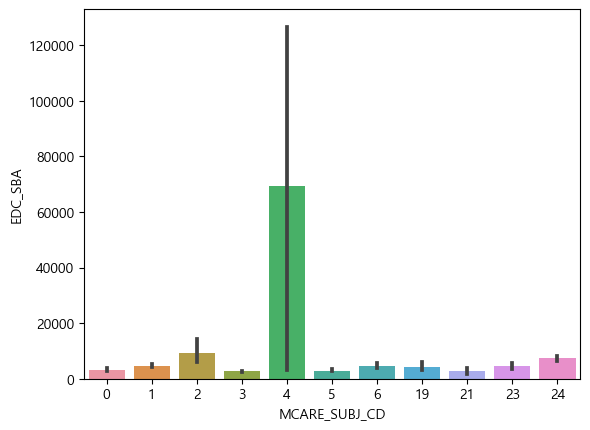

In [10]:
sns.barplot(data=df_BM, x='MCARE_SUBJ_CD', y='EDC_SBA',)

### 2.EDC_SBA 심결본인부담금과 / OPRTN_YN 수술여부
- 범주형
- 본인부담금과 수술여부로 확인할 수 없다. 

In [11]:
df_OPR = df_BM[['EDC_SBA', 'OPRTN_YN']]
df_OPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EDC_SBA   4629 non-null   int64 
 1   OPRTN_YN  4629 non-null   object
dtypes: int64(1), object(1)
memory usage: 72.5+ KB


In [12]:
df_OPR['OPRTN_YN'].value_counts()

0    4626
9       3
Name: OPRTN_YN, dtype: int64

In [13]:
df_OPR.pivot_table(index='OPRTN_YN', aggfunc=len)

,EDC_SBA
OPRTN_YN,
0,4626
9,3


<Axes: xlabel='OPRTN_YN', ylabel='EDC_SBA'>

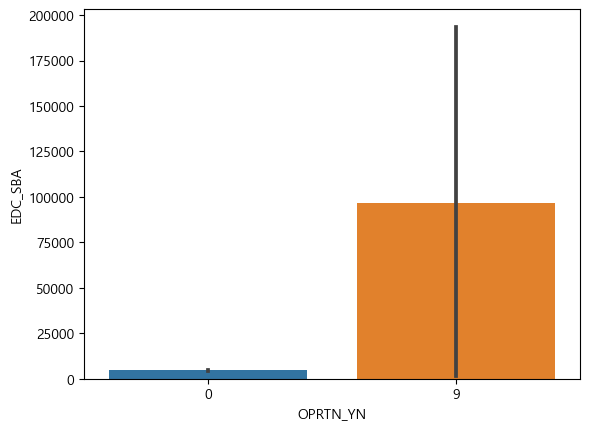

In [14]:
sns.barplot(data=df_BM, x='OPRTN_YN', y='EDC_SBA',)

### 3.EDC_SBA 심결본인부담금과 / MCARE_RSLT_TYPE 진료결과구분
- 최종상태  1: 계속, 2: 이송, 3: 회송, 4 :사망, 9: 퇴원 또는 외래치료 종결 
- 범주형
- 5번이 뭔지 알 수 없음

In [15]:
df_Mrt = df_BM[['EDC_SBA', 'MCARE_RSLT_TYPE']]
df_Mrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   EDC_SBA          4629 non-null   int64 
 1   MCARE_RSLT_TYPE  4205 non-null   object
dtypes: int64(1), object(1)
memory usage: 72.5+ KB


<Axes: xlabel='MCARE_RSLT_TYPE', ylabel='EDC_SBA'>

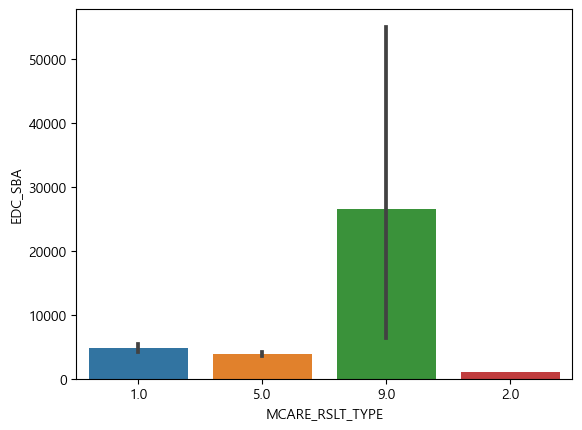

In [16]:
sns.barplot(data=df_BM, x='MCARE_RSLT_TYPE', y='EDC_SBA',)